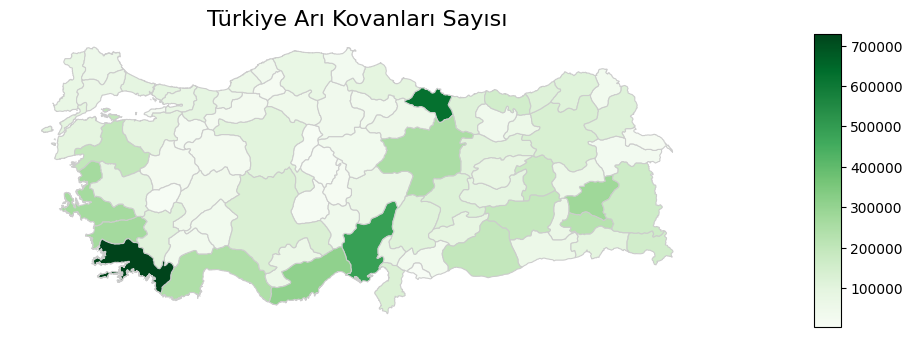

<Figure size 640x480 with 0 Axes>

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1️⃣ Harita sınırlarını yükle
harita = gpd.read_file(r'C:\Users\barki\Documents\Bartex\Aricilik\gadm41_TUR_1.json')

# 2️⃣ CSV verini yükle
veri = pd.read_csv(r'C:\Users\barki\Documents\Bartex\Aricilik\Turkey_Iller_dagilimi_2024_cleaned.csv')

# 3️⃣ İsimleri temizle ve eşleştir
veri['Province'] = veri['Province'].str.upper()
harita['NAME_1'] = harita['NAME_1'].str.upper()

# 4️⃣ Birleştir
birlesik = harita.merge(veri, left_on='NAME_1', right_on='Province')

# 5️⃣ Çizdir
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Daha koyu minimum renkler için min ve max normalize aralığı ayarlıyoruz
vmin = birlesik['Number of Colonies'].min()
vmax = birlesik['Number of Colonies'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Custom colormap (Greens ama beyaza yaklaşmadan)
cmap = plt.cm.Greens

# Legend boyutunu küçültmek için make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # <- buradaki "3%" oranını ayarladım

# Plot
birlesik.plot(
    column='Number of Colonies',
    cmap=cmap,
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    cax=cax,
    norm=norm
)

ax.set_title('Türkiye Arı Kovanları Sayısı', fontsize=16)
ax.axis('off')
plt.show()


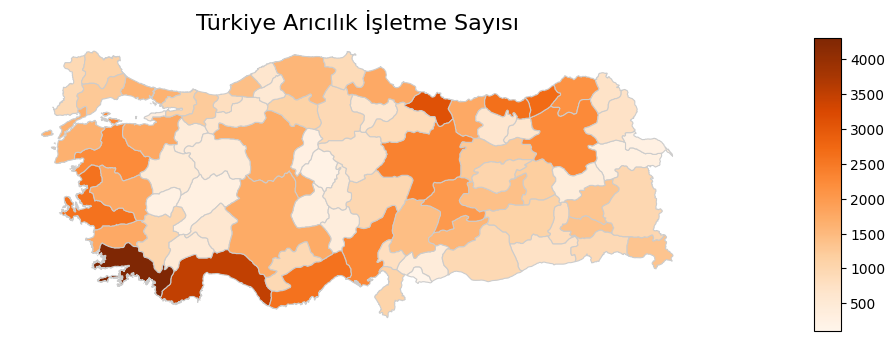

<Figure size 640x480 with 0 Axes>

In [43]:
# Plot işletme sayısı (Number of Enterprises)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

vmin = birlesik['Number of Enterprises'].min()
vmax = birlesik['Number of Enterprises'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

birlesik.plot(
    column='Number of Enterprises',
    cmap=plt.cm.Oranges,  # Renk haritasını biraz farklı yaptım (Oranges)
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    cax=cax,
    norm=norm
)

ax.set_title('Türkiye Arıcılık İşletme Sayısı', fontsize=16)
ax.axis('off')
plt.show()


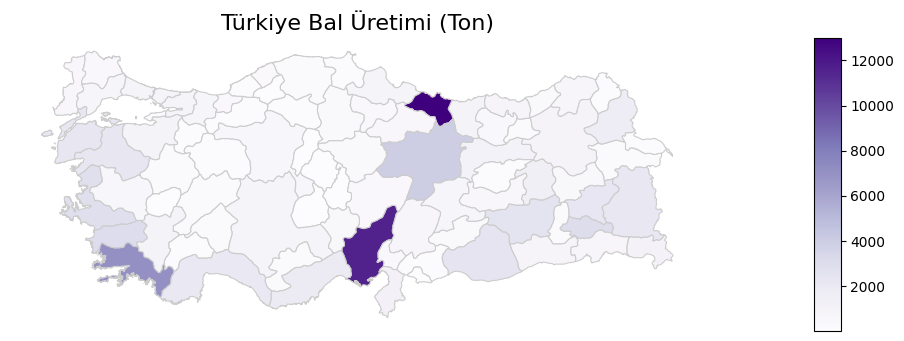

<Figure size 640x480 with 0 Axes>

In [44]:
# Plot bal üretimi (Honey Production) - Purples colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

vmin = birlesik['Honey Production (Ton)'].min()
vmax = birlesik['Honey Production (Ton)'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

birlesik.plot(
    column='Honey Production (Ton)',
    cmap=plt.cm.Purples,  # Mor tonlar
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    cax=cax,
    norm=norm
)

ax.set_title('Türkiye Bal Üretimi (Ton)', fontsize=16)
ax.axis('off')
plt.show()


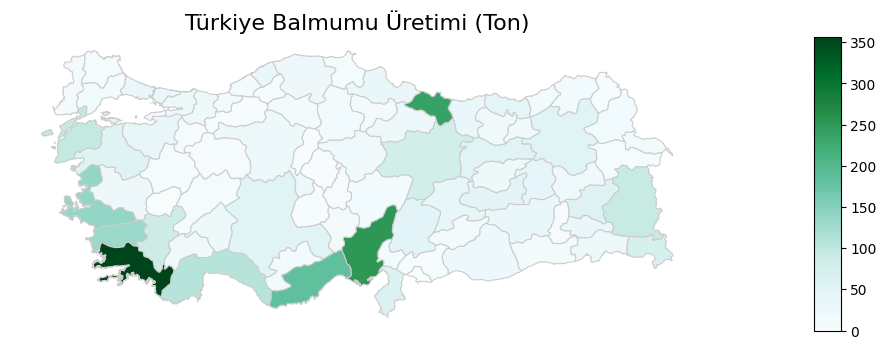

<Figure size 640x480 with 0 Axes>

In [45]:
# Plot balmumu üretimi (Beeswax Production) - BuGn colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

vmin = birlesik['Beeswax Production (Ton)'].min()
vmax = birlesik['Beeswax Production (Ton)'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

birlesik.plot(
    column='Beeswax Production (Ton)',
    cmap=plt.cm.BuGn,  # Yeşil-mavi tonlar (Blue-Green)
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    cax=cax,
    norm=norm
)

ax.set_title('Türkiye Balmumu Üretimi (Ton)', fontsize=16)
ax.axis('off')
plt.show()


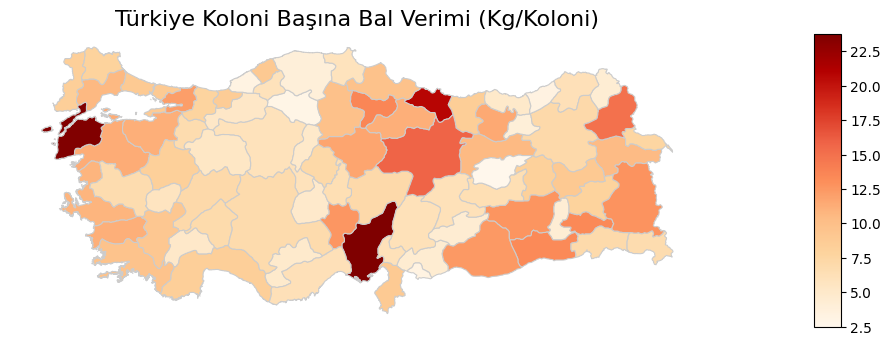

<Figure size 640x480 with 0 Axes>

In [47]:
# Plot bal verimi (Honey Yield) - OrRd colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

vmin = birlesik['Honey Yield (Kg/Colony)'].min()
vmax = birlesik['Honey Yield (Kg/Colony)'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

birlesik.plot(
    column='Honey Yield (Kg/Colony)',
    cmap=plt.cm.OrRd,  # Turuncu-kırmızı tonlar (Orange-Red)
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    cax=cax,
    norm=norm
)

ax.set_title('Türkiye Koloni Başına Bal Verimi (Kg/Koloni)', fontsize=16)
ax.axis('off')
plt.show()

plt.savefig('honey_yield_map.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Yüklemeler
harita = gpd.read_file(r'C:\Users\barki\Documents\Bartex\Aricilik\gadm41_TUR_1.json')
veri = pd.read_csv(r'C:\Users\barki\Documents\Bartex\Aricilik\Turkey_Iller_dagilimi_2024_cleaned.csv')

# İsim normalizasyonu
def turkish_to_english(text):
    replacements = {'Ç': 'C', 'Ğ': 'G', 'İ': 'I', 'Ö': 'O', 'Ş': 'S', 'Ü': 'U',
                    'ç': 'c', 'ğ': 'g', 'ı': 'i', 'ö': 'o', 'ş': 's', 'ü': 'u'}
    for tr, en in replacements.items():
        text = text.replace(tr, en)
    return text

veri['Province'] = veri['Province'].apply(turkish_to_english).str.upper()
harita['NAME_1'] = harita['NAME_1'].apply(turkish_to_english).str.upper()

# Birleştirme
birlesik = harita.merge(veri, left_on='NAME_1', right_on='Province')

# Plot ayarları
metrics = {
    'Number of Colonies': 'Greens',
    'Number of Enterprises': 'Oranges',
    'Honey Production (Ton)': 'YlOrBr',
    'Beeswax Production (Ton)': 'BuGn',
    'Honey Yield (Kg/Colony)': 'OrRd'
}

for column, cmap in metrics.items():
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    vmin = birlesik[column].min()
    vmax = birlesik[column].max()

    birlesik.plot(
        column=column,
        cmap=cmap,
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'shrink': 0.5}
    )

    ax.set_title(f'Türkiye {column}', fontsize=16)
    ax.axis('off')

    filename = column.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('/', '') + '.png'
    fig.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)  # belleği temizlemek için figürü kapat
